# IEEE-CIS Fraud Detection

## Summary


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [3]:
train_identity = pd.read_csv("../data/train_identity.csv")

In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [13]:
len(train_identity)

144233

In [6]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
train_transaction = pd.read_csv("../data/train_transaction.csv")

In [8]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
len(train_transaction)

590540

In [15]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [26]:
missing_value_ratio_list = []
for key in train_transaction.columns:
    try:
        missing_value = sum(np.isnan(train_transaction[key]))/len(train_transaction)
        missing_value_ratio_list.append(missing_value)
        print(key, missing_value) 
    except Exception as e:
        missing_value = sum(train_transaction[key] == "null")/len(train_transaction)
        missing_value_ratio_list.append(missing_value)
        print(key, missing_value)

TransactionID 0.0
isFraud 0.0
TransactionDT 0.0
TransactionAmt 0.0
ProductCD 0.0
card1 0.0
card2 0.015126833068039422
card3 0.0026501168422122124
card4 0.0
card5 0.007212043214684865
card6 0.0
addr1 0.1112642666034477
addr2 0.1112642666034477
dist1 0.596523520845328
dist2 0.9362837403054831
P_emaildomain 0.0
R_emaildomain 0.0
C1 0.0
C2 0.0
C3 0.0
C4 0.0
C5 0.0
C6 0.0
C7 0.0
C8 0.0
C9 0.0
C10 0.0
C11 0.0
C12 0.0
C13 0.0
C14 0.0
D1 0.0021488806854743116
D2 0.4754919226470688
D3 0.44514850814508755
D4 0.2860466691502693
D5 0.524674027161581
D6 0.8760676668811597
D7 0.9340992989467267
D8 0.8731229044603245
D9 0.8731229044603245
D10 0.1287330240119213
D11 0.47293494090154775
D12 0.8904104717715988
D13 0.8950926270870728
D14 0.8946946862193924
D15 0.1509008703898127
M1 0.0
M2 0.0
M3 0.0
M4 0.0
M5 0.0
M6 0.0
M7 0.0
M8 0.0
M9 0.0
V1 0.47293494090154775
V2 0.47293494090154775
V3 0.47293494090154775
V4 0.47293494090154775
V5 0.47293494090154775
V6 0.47293494090154775
V7 0.47293494090154775
V8 0.

V314 0.0021488806854743116
V315 0.0021488806854743116
V316 2.0320384732617603e-05
V317 2.0320384732617603e-05
V318 2.0320384732617603e-05
V319 2.0320384732617603e-05
V320 2.0320384732617603e-05
V321 2.0320384732617603e-05
V322 0.8605496664070174
V323 0.8605496664070174
V324 0.8605496664070174
V325 0.8605496664070174
V326 0.8605496664070174
V327 0.8605496664070174
V328 0.8605496664070174
V329 0.8605496664070174
V330 0.8605496664070174
V331 0.8605496664070174
V332 0.8605496664070174
V333 0.8605496664070174
V334 0.8605496664070174
V335 0.8605496664070174
V336 0.8605496664070174
V337 0.8605496664070174
V338 0.8605496664070174
V339 0.8605496664070174


In [68]:
set_train_identity_id = set(train_identity['TransactionID'])

In [69]:
set_train_transaction_id = set(train_transaction['TransactionID'])

In [71]:
len(set_train_transaction_id - set_train_identity_id)

446307

In [72]:
len(set_train_identity_id - set_train_transaction_id)

0

In [74]:
len(set_train_identity_id&set_train_transaction_id) == len(set_train_identity_id) 

True

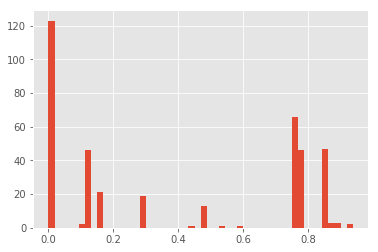

In [29]:
plt.hist(missing_value_ratio_list, bins=50)
plt.show()

In [57]:
lost_feature_num_list = [] 
cut_point_candidates = np.linspace(0,1, 50)
for cut_point in cut_point_candidates:
    print(type(cut_point))
    print(missing_value_ratio_list>cut_point)
    lost_feature_num_list.append(
        sum(missing_value_ratio_list>cut_point)/len(missing_value_ratio_list))
    

<class 'numpy.float64'>
[False False False False False False  True  True False  True False  True
  True  True  True False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  T

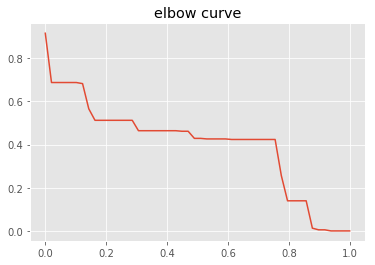

In [36]:
plt.plot(cut_point_candidates, lost_feature_num_list)
plt.title("elbow curve")
plt.show()

## Use the data without missing value

In [66]:
sum(missing_value_ratio_list==np.float64(0))

33

In [62]:
train

<class 'numpy.float64'>


## Reference
- [EDA and models](https://www.kaggle.com/artgor/eda-and-models#General-information)
- [](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203)